In [1]:
#!pip install opencv-python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nb
from tensorflow import keras
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import cv2

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

((50000, 32, 32, 3), (50000, 1)) ((10000, 32, 32, 3), (10000, 1))


There is a total of 50,000 images for training and 10,000 images for testing. Besides, each of these images is of dimensions 32×32 and colour(RBG). The above details can be easily inferred from the shape returned.

Normalization is a common step of image pre-processing and is achieved by simply dividing x_train by 255.0 for the train dataset and x_test by 255.0 for the test dataset. This is essential to maintain the pixels of all the images within a uniform range.

The pixel values in an image are typically represented as integers ranging from 0 to 255, with 0 being the darkest color (black) and 255 being the lightest color (white). However, when working with machine learning algorithms, it is often beneficial to normalize these pixel values to a range between 0 and 1 or -1 and 1.

The main reason for this is that machine learning algorithms typically work better when the input data is centered around zero and has a small variance. When the pixel values are in the range of 0 to 255, they can have a high variance, which can make it difficult for the algorithm to converge during training. Normalizing the pixel values to a smaller range reduces the variance and makes it easier for the algorithm to learn the patterns in the data.

Dividing the pixel values by 255.0 is a common way to normalize the pixel values in an image to the range of 0 to 1. This works because dividing by the maximum possible pixel value (255) scales the pixel values down to the range of 0 to 1. For example, a pixel value of 128 would be scaled down to 0.5 (128 / 255), and a pixel value of 0 would be scaled down to 0 (0 / 255).

In summary, normalization with pixel values helps to standardize the range of pixel values in an image to a common scale, which can improve the performance of machine learning models by making the data more consistent and easier to train on. Dividing the pixel values by 255.0 is a common way to achieve this normalization.


In [5]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


sklearn expects a 2D array as input to the fit() function which will be called on the model during training.

and the images of the test dataset should also be resized to 2D arrays as the model will be trained with this input shape.
In neural networks, we get to specify the input shape to the model and thus it is more flexible. But, in the case of sklearn, there are some restrictions.

In [7]:
x_train2 = x_train.reshape((50000, 32* 32* 3))
x_test2 = x_test.reshape((10000, 32* 32* 3))

In [8]:
print(x_train2.shape,x_test2.shape,y_train.shape,y_test.shape)

(50000, 3072) (10000, 3072) (50000, 1) (10000, 1)


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier()
y_train = y_train.ravel()#DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
                        #rfmodel.fit(x_train2,y_train)
rfmodel.fit(x_train2,y_train)
rfy_pred=rfmodel.predict(x_test2)
rfy_pred


array([2, 8, 8, ..., 3, 5, 7], dtype=uint8)

The output of rfmodel.predict(x_test2) is an array of predicted class labels for the test set x_test2. Each element in the array represents the predicted class label for the corresponding image in the test set.

In your example, the array has a length equal to the number of images in the test set, and the data type is uint8, which means unsigned 8-bit integer. The predicted class labels are integers that range from 0 to 9, where each integer corresponds to one of the 10 classes in the CIFAR-10 dataset.

For example, the first element of the array is 2, which means that the model predicted the first image in the test set belongs to class 2 (which in the CIFAR-10 dataset corresponds to the class "automobile"). Similarly, the second element of the array is 8, which means that the model predicted the second image in the test set belongs to class 8 (which corresponds to the class "ship").


Output-Class

0-Airplane
1-Automobile
2-Bird
3-Cat
4-Deer
5-Dog
6-Frog
7-Horse
8-Ship
9-Truck


You can compare the predicted class labels to the true class labels of the test set to evaluate the performance of the model. This can be done using classification metrics such as accuracy, precision, recall, and F1 score.

In [10]:
accuracy_score(rfy_pred,y_test)
print(classification_report(rfy_pred,y_test))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1029
           1       0.56      0.53      0.55      1059
           2       0.33      0.37      0.35       883
           3       0.29      0.33      0.31       880
           4       0.40      0.41      0.40       967
           5       0.40      0.43      0.41       919
           6       0.56      0.48      0.51      1167
           7       0.47      0.53      0.50       895
           8       0.62      0.59      0.60      1055
           9       0.55      0.48      0.51      1146

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.48      0.47      0.48     10000



 Random Forest Classifier shows only 47% accuracy on the test set.

K-Nearest neighbours is also used for multi-class classification.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train2,y_train)
y_pred_knn=knn.predict(x_test2)
y_pred_knn

C:\HariniLearn\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [12]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



KNN Classifier shows only 34% accuracy on the test set.

Decision Tree Classifier Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train2,y_train)
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([7, 1, 9, ..., 2, 5, 4], dtype=uint8)

In [14]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.34      0.33      0.34      1043
           1       0.28      0.28      0.28       965
           2       0.23      0.21      0.22      1082
           3       0.17      0.17      0.17       947
           4       0.24      0.22      0.23      1059
           5       0.23      0.24      0.23       960
           6       0.27      0.28      0.27       939
           7       0.27      0.28      0.28       966
           8       0.39      0.36      0.38      1078
           9       0.29      0.30      0.29       961

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



Decision tree Classifier shows only 27% accuracy on the test set.

Naive Bayes classifier model

In [15]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train2,y_train)
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [16]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



 Naive Bayes Classifier shows only 30% accuracy on the test set.

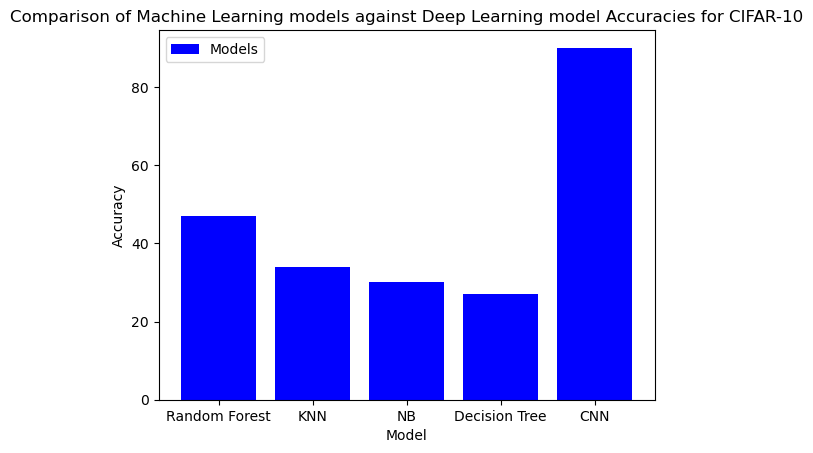

In [17]:
models = ['Random Forest', 'KNN', 'NB', 'Decision Tree','CNN']#Convolution Neural Network is a Deep learning Model
accuracies = [47, 34, 30, 27, 90]
plt.bar(models, accuracies, label='Models', color='b')
plt.legend()
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning models against Deep Learning model Accuracies for CIFAR-10')#The CIFAR-10 dataset is a popular computer vision benchmark dataset consisting of 50,000 training images and 10,000 testing images. Import from tensorflow package, keras lib
plt.show()


Solution: Among the Machine Learning Models Random Forest Model predictions has better acucuracy, but for image classification  Deep learning model like CNN (Convolution Neural Network) is most suited as classification accuracy is much higher.

In [171]:
img_path='dog6.png'
img_arr=cv2.imread(img_path)
img_arr=cv2.resize(img_arr,(32,32))

In [172]:
img_arr2 = img_arr.reshape(1,(32*32*3))

In [173]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
ans=rfmodel.predict(img_arr2)
print(classes[ans[0]])

dog
